In [88]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point, Polygon
import osmnx as ox

In [48]:
loc = pd.read_csv('/Users/itto/Downloads/carris_data/csv_files/CARRIS_Paragens.csv', sep=';')

In [99]:
points = list(zip(loc.Longitude,loc.Latitude))
points = [Point(long,lat) for long,lat in points]

loc = gpd.GeoDataFrame(loc)

loc['geometry'] = points

loc.crs = {'init': 'epsg:4326', 'no_defs': True}

loc = loc.to_crs(epsg=32630)

In [91]:
shp_lisbon = ox.gdf_from_place('Lisbon',which_result=2)

In [108]:
shp_lisbon = shp_lisbon.to_crs(epsg=32630)

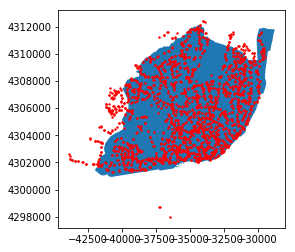

In [114]:
ax = shp_lisbon.plot()
loc.plot(ax=ax, color='r', markersize=2)

In [144]:
df = pd.read_csv('/Users/itto/Downloads/carris_data/csv_files/CARRIS_Amostra.csv', sep=';', low_memory=False)

In [145]:
df.Time_Stamp = pd.to_datetime(df.Time_Stamp, format = '%m/%d/%y %H:%M:%S')

In [142]:
df = df.set_index('Time_Stamp')

In [169]:
df.Time_Stamp.dt.day = 12

ValueError: modifications to a property of a datetimelike object are not supported. Change values on the original.

In [162]:
data_en = df.groupby([pd.Grouper(key='Time_Stamp',freq='5T'),'IDParagem']).Paragem.sum().unstack()

In [164]:
data_en.head()

IDParagem,101,102,103,104,105,106,108,201,202,203,...,89921,89922,89923,89924,89925,89926,94901,94902,94903,94904
Time_Stamp,,,,,,,,,,,,,,,,,,,,,
2018-03-12 00:00:00,NaN,NaN,NaN,10.0,22.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-12 00:05:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-12 00:10:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-12 00:15:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-12 00:20:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [165]:
data_en.groupby(data_en.index.day).mean()

IDParagem,101,102,103,104,105,106,108,201,202,203,...,89921,89922,89923,89924,89925,89926,94901,94902,94903,94904
Time_Stamp,,,,,,,,,,,,,,,,,,,,,
12,33.366667,47.268657,95.250000,78.459016,64.232143,46.909091,78.411765,44.741667,65.705882,31.381818,...,35.000000,7.894737,31.200000,8.235294,40.500000,9.250000,29.714286,3.000000,9.148438,134.750000
13,34.644068,47.000000,102.077922,79.934959,64.935484,49.345455,68.200000,50.034188,76.727273,32.812500,...,29.166667,6.600000,31.200000,6.333333,40.500000,9.052632,124.545455,5.800000,9.241071,155.820513
14,36.088889,38.421053,110.147059,60.325203,49.500000,40.739130,53.281250,37.990909,56.400000,33.549020,...,25.000000,10.000000,37.142857,7.272727,54.000000,10.545455,20.800000,4.888889,8.892086,120.526316
15,36.981132,39.289855,90.250000,79.272727,51.957447,44.192982,56.529412,40.808696,65.524390,28.442308,...,25.000000,9.500000,33.000000,9.611111,104.714286,10.480000,62.000000,4.285714,10.122951,112.823529
16,42.000000,35.685185,98.076923,72.434783,49.000000,44.423077,61.060606,43.576923,57.823529,29.794872,...,NaN,8.727273,26.000000,10.000000,45.000000,9.142857,38.666667,2.571429,9.185484,139.030303


In [135]:
data_en = df.groupby([df.IDParagem, df.Time_Stamp.dt.hour, df.Time_Stamp.dt.minute]).Paragem.sum().unstack(level=[1,2])

In [140]:
data_en

Time_Stamp     0     2      7                                               8  \
Time_Stamp    56    55     17     32     41    43     44     45     49     3    
IDParagem                                                                       
101         28.0  28.0   14.0   28.0   14.0  28.0  112.0   28.0   28.0   28.0   
102          NaN   NaN    NaN    NaN    NaN   NaN   33.0   33.0   66.0    NaN   
103          NaN   NaN    NaN   58.0    NaN   NaN    NaN  261.0  224.0    NaN   
104          NaN   NaN  170.0   32.0   10.0  60.0  114.0  256.0   96.0    NaN   
105          NaN   NaN   22.0    NaN    NaN   NaN  209.0    NaN    NaN    NaN   
106          NaN   NaN    NaN    NaN    NaN   NaN    NaN   60.0    NaN   15.0   
108          NaN   NaN    NaN    NaN    NaN   NaN    NaN    NaN    NaN    NaN   
201          NaN   NaN   24.0    NaN    NaN  24.0   55.0    NaN    NaN   78.0   
202          NaN   NaN    NaN    NaN   27.0   NaN    NaN    NaN  105.0    NaN   
203          NaN   NaN   26.0    NaN    NaN   NaN    NaN    NaN    NaN    NaN   
204          NaN   NaN    NaN    NaN    NaN   NaN    NaN   34.0    NaN    NaN   
205          NaN   NaN   16.0    NaN    NaN   NaN    8.0   24.0    NaN    NaN   
208          NaN   NaN    NaN    NaN    NaN   NaN    NaN    NaN    NaN    NaN   
301          NaN   NaN   18.0   30.0    NaN   NaN    NaN    6.0   18.0    NaN   
302          NaN   NaN  144.0   24.0    NaN  60.0  156.0  177.0    NaN  108.0   
304          NaN   NaN    NaN    NaN    2.0  11.0    NaN    NaN    NaN    NaN   
305          NaN   NaN    NaN    NaN    NaN   NaN    NaN    NaN   24.0    NaN   
306          NaN   NaN    NaN    NaN  514.0  80.0    NaN    NaN  180.0   36.0   
307          NaN  25.0    NaN    NaN   33.0   NaN    NaN   25.0   11.0    NaN   
308          NaN   NaN    NaN    NaN    NaN   NaN    NaN  160.0  175.0    NaN   
310          NaN   NaN    NaN    NaN    NaN   NaN    NaN   31.0    NaN    NaN   
311          NaN   NaN    NaN    4.0    NaN  16.0    NaN   12.0    NaN    NaN   
312          NaN   NaN    NaN   19.0  149.0  57.0   19.0    NaN    NaN  171.0   
313          NaN   NaN    NaN    NaN   11.0   NaN   20.0   10.0    NaN    NaN   
314          NaN   NaN    NaN    NaN    NaN   NaN    NaN    4.0    4.0    3.0   
317          NaN   NaN    NaN    NaN    NaN  52.0    NaN    NaN   58.0    NaN   
318          NaN   NaN    NaN    NaN   15.0   NaN    NaN    NaN    NaN    NaN   
319          NaN   NaN    NaN    NaN    NaN   NaN    NaN    NaN   84.0    NaN   
320          NaN   NaN    5.0    NaN   10.0  12.0   23.0    3.0    NaN   25.0   
321          NaN   NaN   36.0   10.0   27.0  27.0    4.0    NaN    8.0   10.0   
...          ...   ...    ...    ...    ...   ...    ...    ...    ...    ...   
89901        NaN   NaN   49.0    NaN    NaN   NaN    NaN    NaN    NaN   84.0   
89902        NaN   NaN    NaN    NaN    NaN   NaN    NaN    NaN    NaN    NaN   
89903        NaN   NaN    NaN    NaN   20.0  27.0   87.0    NaN    NaN    NaN   
89904        NaN   NaN    NaN    NaN    NaN   NaN    NaN    NaN    NaN    NaN   
89905        NaN   NaN    4.0  161.0   91.0   NaN  105.0   65.0    NaN   10.0   
89906        NaN   NaN    NaN  270.0    NaN   NaN  196.0  280.0  202.0  254.0   
89907        NaN   NaN   16.0    NaN    8.0   NaN    NaN    NaN    NaN    NaN   
89908        NaN   NaN    NaN    NaN    NaN   NaN    NaN    NaN   14.0    NaN   
89909        NaN   NaN    NaN    NaN    NaN   NaN    NaN    NaN    NaN    NaN   
89910        NaN   NaN    NaN    NaN    NaN   NaN    NaN    NaN    NaN    NaN   
89911        NaN   NaN    NaN    NaN    NaN   NaN    NaN   29.0    NaN   58.0   
89912        NaN   NaN    NaN    NaN    NaN   NaN    NaN    NaN    NaN    NaN   
89913        NaN   NaN   26.0    NaN   54.0   NaN    NaN   81.0    3.0    NaN   
89914        NaN   NaN    NaN    NaN    NaN   NaN    NaN    NaN    NaN    NaN   
89915        NaN   NaN    NaN    NaN   13.0   NaN    NaN    NaN    NaN    NaN   
89916        NaN   NaN    NaN  

In [139]:
data_en.groupby(pd.Grouper(freq='5Min'))

TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'Int64Index'

In [137]:
data_en.loc[101]

Time_Stamp  Time_Stamp
0           56             28.0
2           55             28.0
7           17             14.0
            32             28.0
            41             14.0
            43             28.0
            44            112.0
            45             28.0
            49             28.0
8           3              28.0
            5              84.0
            17             56.0
            18             14.0
            19             28.0
            22             28.0
            24             56.0
            26             28.0
            28             56.0
            29             42.0
            35             28.0
            37             28.0
            38             56.0
            42             28.0
            45             14.0
            49            112.0
            53             56.0
            54             28.0
            55             14.0
            57             84.0
            58             14.0
                 

In [125]:
ndays = df.Time_Stamp.dt.day.nunique()

In [126]:
data_en /= ndays

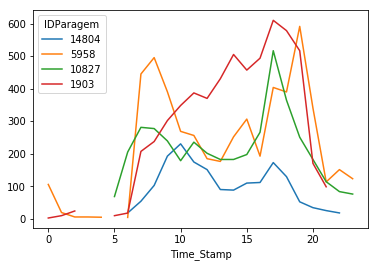

In [123]:
data_en.sample(4).T.plot()

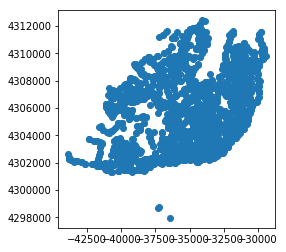